The code below ensures that when cells have multiple outputs all outputs are seen, not just the last one which is the default.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Objective 0

Importing necessary packages to perform EDA on the Ames Data Set.

In [2]:
import numpy as np
import pandas as pd
import os
import pickle

Ensuring the datasets are in my current directory. Once confirmed, I import the data as a pandas dataframe, amesDF.

In [3]:
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'amesDF.pickle',
 'amesNumDFclean.pickle',
 'amesNumDFclean2.pickle',
 'amesSelDF.pickle',
 'Assigment_1_Objective_5.docx',
 'Assigment_1_Objective_5.pdf',
 'assign-1-radon-data.pickle',
 'Chapter_2_Housing.ipynb',
 'DataDocumentation.txt',
 'datasets',
 'decock.pdf',
 'Exercise_2.zip',
 'Jonah MunizAssignment-1.ipynb',
 'JonahMuniz_Assignment1.docx',
 'JonahMuniz_Assignment1.pdf',
 'Jonah_Muniz_Assignment_2.ipynb',
 'Jonah_Muniz_Assignment_2_Objective_6.docx',
 'Maronna2011_Article_AlanJulianIzenman2008ModernMul.pdf',
 'Modern Multivariate Statistical Techniques_Regression, Classification, and Manifold Learning.pdf',
 'RF.pickleDB',
 'sqlite-tools-osx-x86-3340100',
 'Web_Login_Discussion.pptx',
 '__MACOSX',
 '~$nahMuniz_Assignment1.docx']

In [4]:
amesDF=pd.read_pickle('amesDF.pickle')

Now that the data has been imported I call dtypes on the dataframe to get an understanding on the data types in the dataframe as well as the count of each type. Right away I notice 32 int64 and 2 float 64 columns. Due to the fact that kmeans need numeric data only, I need to convert the 32 int 64 columns to float dtypes and create a new num dataframe.

In [5]:
amesDF.dtypes.value_counts()

object     40
int64      32
float64     2
dtype: int64

In [6]:
amesNumDF=amesDF.select_dtypes(include=np.number).astype('float')

In [7]:
amesNumDF.dtypes.value_counts()

float64    34
dtype: int64

The columns in the new num dataframe can be seen below. 

In [8]:
amesNumDF.columns

Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Gr_Liv_Area',
       'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath',
       'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces',
       'Garage_Cars', 'Garage_Area', 'Wood_Deck_SF', 'Open_Porch_SF',
       'Enclosed_Porch', 'Three_season_porch', 'Screen_Porch', 'Pool_Area',
       'Misc_Val', 'Mo_Sold', 'Year_Sold', 'Sale_Price', 'Longitude',
       'Latitude'],
      dtype='object')

In [9]:
amesNumDF.describe()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Year_Sold,Sale_Price,Longitude,Latitude
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.647782,10147.921843,1971.356314,1984.266553,101.096928,4.177474,49.705461,559.071672,1051.255631,1159.557679,...,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068,-93.642897,42.034482
std,33.499441,7880.017759,30.245361,20.860286,178.634545,2.233372,169.142089,439.540571,440.968018,391.890885,...,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357,0.025700,0.018410
min,0.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,-93.693153,41.986498
25%,43.000000,7440.250000,1954.000000,1965.000000,0.000000,3.000000,0.000000,219.000000,793.000000,876.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000,-93.660217,42.022088
50%,63.000000,9436.500000,1973.000000,1993.000000,0.000000,3.000000,0.000000,465.500000,990.000000,1084.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000,-93.641806,42.034662
75%,78.000000,11555.250000,2001.000000,2004.000000,162.750000,7.000000,0.000000,801.750000,1301.500000,1384.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000,-93.622113,42.049853
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,7.000000,1526.000000,2336.000000,6110.000000,5095.000000,...,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000,-93.577427,42.063388


In [100]:
amesNumDF['Gr_Liv_Area'].describe()

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Gr_Liv_Area, dtype: float64

The assignment calls for removing rows where the house sqft is larger than 4,000 due to these rows being outliers in the data. This is done below be creating a new data set where above ground living area square feet is less than 4,000. This removes 5 rows from the data.

In [101]:
amesNumDF2= amesNumDF[amesNumDF['Gr_Liv_Area'] < 4000]

In [102]:
amesNumDF2.describe()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Year_Sold,Sale_Price,Longitude,Latitude
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,...,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,57.460855,10103.583590,1971.302906,1984.234188,99.918632,4.179487,49.790427,558.756239,1046.494359,1155.461197,...,23.050940,2.596923,16.029402,1.893333,44.909744,6.216752,2007.791453,180411.574701,-93.642853,42.034488
std,33.075613,7781.999124,30.242474,20.861774,175.566155,2.234750,169.274143,439.667673,421.482215,376.592039,...,64.186809,25.162589,56.131397,32.964272,472.237990,2.711541,1.317408,78554.857286,0.025697,0.018411
min,0.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,-93.693153,41.986498
25%,43.000000,7438.000000,1954.000000,1965.000000,0.000000,3.000000,0.000000,218.000000,792.000000,876.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000,-93.660187,42.022089
50%,63.000000,9428.000000,1973.000000,1993.000000,0.000000,3.000000,0.000000,464.000000,989.000000,1082.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000,-93.641793,42.034663
75%,78.000000,11515.000000,2001.000000,2004.000000,162.000000,7.000000,0.000000,801.000000,1299.000000,1383.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000,-93.622076,42.049832
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,7.000000,1526.000000,2336.000000,3206.000000,3820.000000,...,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000,625000.000000,-93.577427,42.063388


In [13]:
from pandas_profiling import ProfileReport
amesNumDF2Profile=ProfileReport(amesNumDF2,'ames data',explorative=True)
amesNumDF2Profile.to_notebook_iframe()

Based on the above profiles of each feature I have compiled a list of numerical features that I believe will be useful. My criteria for the features selected is that there needed to be less then 20% of all values being zero. Although some of these feautres may be relevant, if too many of the total rows of the feature are zero it will negatively effect the model.The new dataframe with the selected features can be seen below.

In [103]:
amesNumDF2 = amesNumDF2[['Lot_Frontage','Lot_Area','Year_Built','Year_Remod_Add','Total_Bsmt_SF','First_Flr_SF','Gr_Liv_Area',
                          'Bedroom_AbvGr','TotRms_AbvGrd','Garage_Cars','Garage_Area','Sale_Price','Bsmt_Unf_SF','Year_Sold','Mo_Sold']].copy()

Based on the my knowledge of the data set and the features I start to search for potential erroneous data points. For example, if a house year_remod_add is less than year_build, etc.

In [104]:
amesNumDF2.loc[amesNumDF2['Year_Built'] - amesNumDF2['Year_Remod_Add']  > 0]

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Gr_Liv_Area,Bedroom_AbvGr,TotRms_AbvGrd,Garage_Cars,Garage_Area,Sale_Price,Bsmt_Unf_SF,Year_Sold,Mo_Sold
850,65.0,10739.0,2002.0,2001.0,1431.0,1444.0,1444.0,3.0,6.0,2.0,577.0,203000.0,172.0,2009.0,4.0


Dropping row 850 due to Year_Remod_Add occuring before Year_Built.

In [105]:
amesNumDF2.drop(850)

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Gr_Liv_Area,Bedroom_AbvGr,TotRms_AbvGrd,Garage_Cars,Garage_Area,Sale_Price,Bsmt_Unf_SF,Year_Sold,Mo_Sold
0,141.0,31770.0,1960.0,1960.0,1080.0,1656.0,1656.0,3.0,7.0,2.0,528.0,215000.0,441.0,2010.0,5.0
1,80.0,11622.0,1961.0,1961.0,882.0,896.0,896.0,2.0,5.0,1.0,730.0,105000.0,270.0,2010.0,6.0
2,81.0,14267.0,1958.0,1958.0,1329.0,1329.0,1329.0,3.0,6.0,1.0,312.0,172000.0,406.0,2010.0,6.0
3,93.0,11160.0,1968.0,1968.0,2110.0,2110.0,2110.0,3.0,8.0,2.0,522.0,244000.0,1045.0,2010.0,4.0
4,74.0,13830.0,1997.0,1998.0,928.0,928.0,1629.0,3.0,6.0,2.0,482.0,189900.0,137.0,2010.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.0,7937.0,1984.0,1984.0,1003.0,1003.0,1003.0,3.0,6.0,2.0,588.0,142500.0,184.0,2006.0,3.0
2926,0.0,8885.0,1983.0,1983.0,864.0,902.0,902.0,2.0,5.0,2.0,484.0,131000.0,239.0,2006.0,6.0
2927,62.0,10441.0,1992.0,1992.0,912.0,970.0,970.0,3.0,6.0,0.0,0.0,132000.0,575.0,2006.0,7.0
2928,77.0,10010.0,1974.0,1975.0,1389.0,1389.0,1389.0,2.0,6.0,2.0,418.0,170000.0,195.0,2006.0,4.0


Inspecting the dataframe to see if there are any rows that are duplicated in the dataframe.

In [106]:
amesNumDF2.duplicated().sum()

2

It can be seen that there are 3 rows that are duplicated, we will remove those rows below.

In [107]:
amesNumDF2UnDup=amesNumDF2.drop_duplicates()
amesNumDF2UnDup.duplicated().sum()

0

Saving the new cleaned DataFrame.

In [108]:
amesNumDF2UnDup.to_pickle('amesNumDFclean.pickle')

## Objective 1

Importing the necessary packages to complete objective 1.

In [75]:
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans, MiniBatchKMeans
%matplotlib inline
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [76]:
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'amesDF.pickle',
 'amesNumDFclean.pickle',
 'amesNumDFclean2.pickle',
 'amesSelDF.pickle',
 'Assigment_1_Objective_5.docx',
 'Assigment_1_Objective_5.pdf',
 'assign-1-radon-data.pickle',
 'Chapter_2_Housing.ipynb',
 'DataDocumentation.txt',
 'datasets',
 'decock.pdf',
 'Exercise_2.zip',
 'Jonah MunizAssignment-1.ipynb',
 'JonahMuniz_Assignment1.docx',
 'JonahMuniz_Assignment1.pdf',
 'Jonah_Muniz_Assignment_2.ipynb',
 'Jonah_Muniz_Assignment_2_Objective_6.docx',
 'Maronna2011_Article_AlanJulianIzenman2008ModernMul.pdf',
 'Modern Multivariate Statistical Techniques_Regression, Classification, and Manifold Learning.pdf',
 'RF.pickleDB',
 'sqlite-tools-osx-x86-3340100',
 'Web_Login_Discussion.pptx',
 '__MACOSX',
 '~$nahMuniz_Assignment1.docx']

Importing the cleaned dataset from Objective 0 and calculating high level statistics for each feature.

In [77]:
AmesSelDF=pd.read_pickle('amesNumDFclean.pickle')
AmesSelDF.columns

Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
       'Total_Bsmt_SF', 'First_Flr_SF', 'Gr_Liv_Area', 'Bedroom_AbvGr',
       'TotRms_AbvGrd', 'Garage_Cars', 'Garage_Area', 'Sale_Price',
       'Bsmt_Unf_SF', 'Year_Sold'],
      dtype='object')

In [78]:
AmesSelDF.describe()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Gr_Liv_Area,Bedroom_AbvGr,TotRms_AbvGrd,Garage_Cars,Garage_Area,Sale_Price,Bsmt_Unf_SF,Year_Sold
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,57.465777,10106.288159,1971.283025,1984.227242,1046.626283,1155.179671,1494.044832,2.853525,6.434292,1.764887,471.855236,180423.168378,558.806297,2007.790897
std,33.089491,7785.105503,30.249453,20.868256,421.139556,376.646746,486.491022,0.827735,1.558171,0.760069,213.865842,78585.086170,439.282922,1.317623
min,0.000000,1300.000000,1872.000000,1950.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,0.000000,12789.000000,0.000000,2006.000000
25%,43.000000,7440.250000,1954.000000,1965.000000,792.250000,876.000000,1125.250000,2.000000,5.000000,1.000000,320.000000,129500.000000,219.000000,2007.000000
50%,63.000000,9429.000000,1973.000000,1993.000000,988.500000,1082.000000,1441.000000,3.000000,6.000000,2.000000,480.000000,160000.000000,464.500000,2008.000000
75%,78.000000,11518.750000,2000.750000,2004.000000,1298.750000,1382.750000,1740.000000,3.000000,7.000000,2.000000,576.000000,213500.000000,801.000000,2009.000000
max,313.000000,215245.000000,2010.000000,2010.000000,3206.000000,3820.000000,3820.000000,8.000000,14.000000,5.000000,1488.000000,625000.000000,2336.000000,2010.000000


Sale_Price is the target variable we will be training emsembles to predict later on so we will set it aside. The code below creates a new dataframe without Sale_Price as well converts the dataframe into a numpy array.It also ensures all datatypes in the array are float 32.

In [79]:
AmesClusDF=AmesSelDF.loc[:,~(AmesSelDF.columns.isin(['Sale_Price']))].astype('float32')
X=AmesClusDF.to_numpy(copy=True) 

Using the KMeans algo I am running a for loop below to calculate the cluster breakdown, silhouette score, davies bouldin score and calinski harabasz score for cluster 2 through 12. The goal is to understand what amount of clusters maxmizes the silhouette score thus maximizing the homogenity of the clusters.

In [80]:
clus_sil_score = []
clus_dav_score = []
clus_cal_score = []
clus_breakdown = []
for i in range(11):
    kmMB = KMeans(n_clusters=i +2, random_state=11).fit(X)
    labelMB8=kmMB.predict(X)
    cluster_break = pd.Series(labelMB8).value_counts()
    clus_cal_score.append(calinski_harabasz_score(X,labelMB8))
    clus_dav_score.append(davies_bouldin_score(X,labelMB8))
    clus_sil_score.append(silhouette_score(X,labelMB8))
    clus_breakdown.append(cluster_break)
print(clus_sil_score,clus_dav_score,clus_cal_score)

[0.96619457, 0.7641298, 0.45700058, 0.46143505, 0.45215404, 0.46282232, 0.4153855, 0.39257067, 0.39260954, 0.3825749, 0.3538957] [0.19416140903180965, 0.49073681386804163, 0.5645511507696509, 0.5614900041442086, 0.5692813743740733, 0.513506436882549, 0.5631911356493917, 0.5991345213788357, 0.504469358628776, 0.5152518781937055, 0.5722997351622109] [3234.746543419262, 3711.057107356284, 4899.119948063797, 5703.858558001865, 6065.049423364886, 6672.372729355678, 7388.412093911824, 7762.505801103305, 8474.02163440365, 9322.967667136241, 9749.882619667407]


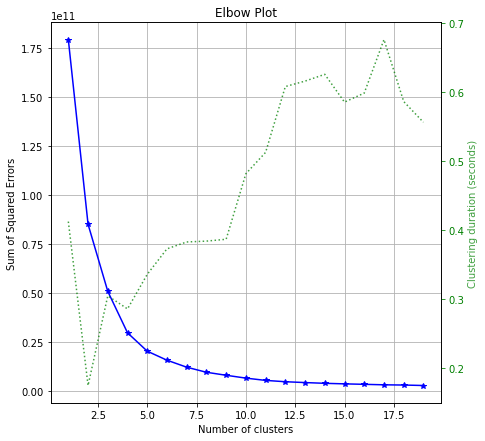

In [81]:
kmMB=KMeans(random_state=88)
skplt.cluster.plot_elbow_curve(kmMB,X,n_jobs=-1,cluster_ranges=range(1,20),
                            figsize=(7,7))
plt.show();

Looking at the silhouette scores, davies-boulden scores and the elbow plot it can be seen that the optimal number of clusters is 5. A breakdown of the counts for the 5 clusters can be seen below as well as the silhouette plot.

In [82]:
kmMB2 = KMeans(n_clusters=5, random_state=11).fit(X)
labels=kmMB2.predict(X)
pd.Series(labels).value_counts()

0    1712
4     783
3     394
2      29
1       4
dtype: int64

You immediatley see that there are two very small clusters. My thinking here is that there are a few houses that have very unique features that justify their own cluster.

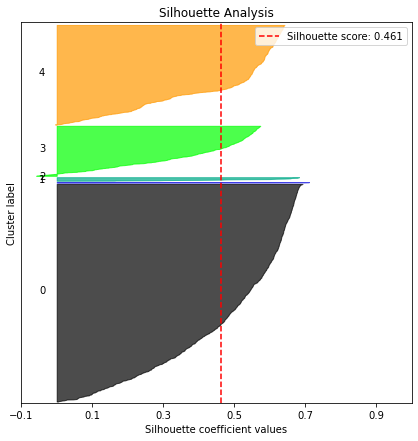

In [83]:
skplt.metrics.plot_silhouette(X, labels,figsize=(7,7))
plt.show();

## Objective 2

Importing the necessary packages for Objective 2. Checking the current folder to ensure the right file is in there and loading the num clean dataset. I am also ensuring there are zero missing values in the dataset.

In [109]:
import numpy as np
import pandas as pd
import os
from pickleshare import *
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [110]:
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'amesDF.pickle',
 'amesNumDFclean.pickle',
 'amesNumDFclean2.pickle',
 'amesSelDF.pickle',
 'Assigment_1_Objective_5.docx',
 'Assigment_1_Objective_5.pdf',
 'assign-1-radon-data.pickle',
 'Chapter_2_Housing.ipynb',
 'DataDocumentation.txt',
 'datasets',
 'decock.pdf',
 'Exercise_2.zip',
 'Jonah MunizAssignment-1.ipynb',
 'JonahMuniz_Assignment1.docx',
 'JonahMuniz_Assignment1.pdf',
 'Jonah_Muniz_Assignment_2.ipynb',
 'Jonah_Muniz_Assignment_2_Objective_6.docx',
 'Maronna2011_Article_AlanJulianIzenman2008ModernMul.pdf',
 'Modern Multivariate Statistical Techniques_Regression, Classification, and Manifold Learning.pdf',
 'RF.pickleDB',
 'sqlite-tools-osx-x86-3340100',
 'Web_Login_Discussion.pptx',
 '__MACOSX',
 '~$nahMuniz_Assignment1.docx']

In [111]:
aDF=pd.read_pickle('amesNumDFclean.pickle')
print(aDF.describe())

       Lot_Frontage       Lot_Area   Year_Built  Year_Remod_Add  \
count   2923.000000    2923.000000  2923.000000     2923.000000   
mean      57.457749   10104.400958  1971.294902     1984.234690   
std       33.086676    7784.441928    30.251093       20.868571   
min        0.000000    1300.000000  1872.000000     1950.000000   
25%       43.000000    7439.000000  1954.000000     1965.000000   
50%       63.000000    9428.000000  1973.000000     1993.000000   
75%       78.000000   11517.500000  2001.000000     2004.000000   
max      313.000000  215245.000000  2010.000000     2010.000000   

       Total_Bsmt_SF  First_Flr_SF  Gr_Liv_Area  Bedroom_AbvGr  TotRms_AbvGrd  \
count    2923.000000   2923.000000  2923.000000    2923.000000    2923.000000   
mean     1046.799863   1155.316114  1494.065344       2.853233       6.434143   
std       421.172053    376.654533   486.409033       0.827744       1.557925   
min         0.000000    334.000000   334.000000       0.000000       2.0

Below I am doing a couple checks of the dataset to ensure that the data makes sense prior to rescaling. First check is to ensure there are zero NA values. Next I am checking that all rows where livable Sqft is greater than 4,000 is removed. I am also doing a couple logical checks of the data, ensuring that there are zero rows where the home was built after it was sold, house was remodeled before being built and any rows where the house was remolded after being sold. As it can be seen, there is one example of a house being remodeled before being built as well as being remodeled after being sold. These rows should be removed.

In [112]:
aDF.isna().sum().sum()

0

In [113]:
aDF2=aDF[aDF.Gr_Liv_Area<4000].copy()   
aDF2.shape

(2923, 15)

In [114]:
((aDF2.Year_Built-aDF2.Year_Sold)>0.00).value_counts()

False    2923
dtype: int64

In [115]:
((aDF2.Year_Built-aDF2.Year_Remod_Add)>0.00).value_counts()

False    2922
True        1
dtype: int64

In [116]:
((aDF2.Year_Remod_Add-aDF2.Year_Sold)>0.00).value_counts()

False    2922
True        1
dtype: int64

Removing the two illogical rows discovered above.

In [117]:
aDF3=aDF2.loc[~((aDF2.Year_Built-aDF2.Year_Remod_Add)>0.00),:].copy()
aDF3.shape

(2922, 15)

In [118]:
aDF4=aDF3.loc[~((aDF2.Year_Remod_Add-aDF2.Year_Sold)>0.00),:].copy()
aDF4.shape

(2921, 15)

Beause Mo_Sold column is not really numeric, we will have to encode the categorical values so that we represent the meaning of the categories numerically. This is done by creating dummies below. Sale_Month is removed from the dataset below and the new dummies for Mo_Sold is added to the dataset.

In [119]:
moDummies=pd.get_dummies(aDF4.Mo_Sold,prefix="sales_mo").astype(int)
moDummies.columns

Index(['sales_mo_1.0', 'sales_mo_2.0', 'sales_mo_3.0', 'sales_mo_4.0',
       'sales_mo_5.0', 'sales_mo_6.0', 'sales_mo_7.0', 'sales_mo_8.0',
       'sales_mo_9.0', 'sales_mo_10.0', 'sales_mo_11.0', 'sales_mo_12.0'],
      dtype='object')

In [120]:
aDF5=aDF4.loc[:,~(aDF4.columns.isin(['Sale_Month']))]
aDF6=pd.concat([aDF5,moDummies],axis=1,ignore_index=False)
aDF6.columns

Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
       'Total_Bsmt_SF', 'First_Flr_SF', 'Gr_Liv_Area', 'Bedroom_AbvGr',
       'TotRms_AbvGrd', 'Garage_Cars', 'Garage_Area', 'Sale_Price',
       'Bsmt_Unf_SF', 'Year_Sold', 'Mo_Sold', 'sales_mo_1.0', 'sales_mo_2.0',
       'sales_mo_3.0', 'sales_mo_4.0', 'sales_mo_5.0', 'sales_mo_6.0',
       'sales_mo_7.0', 'sales_mo_8.0', 'sales_mo_9.0', 'sales_mo_10.0',
       'sales_mo_11.0', 'sales_mo_12.0'],
      dtype='object')

In [121]:
aDF6.dtypes.value_counts()

float64    15
int32      12
dtype: int64

Since the year feature is capped at 2010 and there is no relativity between the features we need to remove years, transform the feature so that it is years before 2010, and place the feature back into the dataset. First the year features are placed in a new dataset then removed from the original dataset. A transformation is then done on the new year feature dataset to transform to years before 2010. These new features are then added to the original dataset.

In [122]:
years=['Year_Built','Year_Remod_Add','Year_Sold']
yearsDF=aDF6.loc[:,years]
aDF7=aDF6.loc[:,~(aDF6.columns.isin(years))]

In [123]:
yearsDF=yearsDF.transform(lambda x: 2010-x)
yearsDF.head()

,Year_Built,Year_Remod_Add,Year_Sold
0,50.0,50.0,0.0
1,49.0,49.0,0.0
2,52.0,52.0,0.0
3,42.0,42.0,0.0
4,13.0,12.0,0.0


In [124]:
aDF8=pd.concat([aDF7,yearsDF],axis=1)
aDF8.columns

Index(['Lot_Frontage', 'Lot_Area', 'Total_Bsmt_SF', 'First_Flr_SF',
       'Gr_Liv_Area', 'Bedroom_AbvGr', 'TotRms_AbvGrd', 'Garage_Cars',
       'Garage_Area', 'Sale_Price', 'Bsmt_Unf_SF', 'Mo_Sold', 'sales_mo_1.0',
       'sales_mo_2.0', 'sales_mo_3.0', 'sales_mo_4.0', 'sales_mo_5.0',
       'sales_mo_6.0', 'sales_mo_7.0', 'sales_mo_8.0', 'sales_mo_9.0',
       'sales_mo_10.0', 'sales_mo_11.0', 'sales_mo_12.0', 'Year_Built',
       'Year_Remod_Add', 'Year_Sold'],
      dtype='object')

Now that we have cleansed the data we can remove the target variable,Sale_Price, from the dataset. Also creating the features that will be used to train the RF models. There are 22 features in X.

In [145]:
y=aDF8.Sale_Price.to_numpy(copy=True)  
SFfeats=aDF8.columns.to_list()[:9]
salesFeats=list(filter(lambda s: s.startswith('sales_'),
                       aDF8.columns.to_list()))  

RFfeatures=SFfeats+salesFeats
X=aDF8.loc[:,RFfeatures].to_numpy(copy=True)
X.shape
y.shape

(2921, 21)

(2921,)

Now that the target variable has been removed the dataset it is now time to split both data sets to test and train sets. The data is then saved.

In [146]:
XTrain, XTest, yTrain, yTest = train_test_split(X,y,train_size = 0.85, test_size = 0.15, random_state=11)
trainTestData=[XTrain,XTest, yTrain, yTest]
XTrain.shape, XTest.shape, yTrain.shape, yTest.shape

((2482, 21), (439, 21), (2482,), (439,))

Creating two additional train and test sets that are scaled using StandardScaler to see if rescalling improves the performance.

In [147]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
TrainXS = num_pipeline.fit_transform(XTrain)
TestXS = num_pipeline.fit_transform(XTest)
trainTestData = [XTrain,XTest,yTrain,yTest,TrainXS,TestXS]

In [148]:
RFdb=PickleShareDB('RF.pickleDB')
RFdb.clear()

In [149]:
RFdb['trainTestData']=trainTestData

## Objective 3

Importing the sklearn decomposition PCA package to perform feature reduction on  the train and test dataset created in Objective 2. 

In [150]:
from sklearn.decomposition import PCA

Below PCA model is looking to transform the train and test datasets to only have features that are responsible for 80% or more of the variance in the data.

In [151]:
pca80=PCA(n_components=0.80,svd_solver='full')
pca80.fit(XTrain)
trainXPCA=pca80.transform(XTrain)
testXPCA=pca80.transform(XTest)

PCA(n_components=0.8, svd_solver='full')

Examing the shape of both the train and test datasets it can be seen that one feature is responsible for 80% of the variance.

In [152]:
trainXPCA.shape
testXPCA.shape

(2482, 1)

(439, 1)

## Objective 4

Below I am training the first RF model using the XTrain and yTrain data set. Setting the hyperparameters as max_features = log2,  out of  box  scoring = true, 100 trees,and the rest are set to default.

In [153]:
RFregr=RandomForestRegressor(max_features='log2',oob_score=True,n_jobs=-1,
                            random_state=11, n_estimators = 100, max_depth = None)
RFregr.fit(XTrain,yTrain)

RandomForestRegressor(max_features='log2', n_jobs=-1, oob_score=True,
                      random_state=11)

In [154]:
print(f'RF R Squared, Training: {RFregr.score(XTrain,yTrain):5.3f}')
print(f'RF R Squared, OOB: {RFregr.oob_score_:5.3f}')
predTesty=RFregr.predict(XTest)
print(f'Test Data R Squared: {r2_score(yTest,predTesty):4.3f}')

RF R Squared, Training: 0.974
RF R Squared, OOB: 0.812
Test Data R Squared: 0.831


It seems that the model is overfitting a bit with the training data. Still see a relatively high R squared value when exposing the model to unseen data, aka the test dataset.

In [156]:
RFregr.feature_importances_
RFFeatImpDF=pd.DataFrame({'feature':RFfeatures,
                          'importance':RFregr.feature_importances_})
print('Feature importances')
RFFeatImpDF.sort_values('importance',ascending=False)

array([0.04707192, 0.06281027, 0.14928022, 0.11323831, 0.20866364,
       0.03010701, 0.05467705, 0.16041297, 0.13931563, 0.00248394,
       0.00339452, 0.00245607, 0.00271565, 0.00317622, 0.00329105,
       0.00360529, 0.00264682, 0.00278092, 0.00303682, 0.00284273,
       0.00199294])

Feature importances


,feature,importance
4,Gr_Liv_Area,0.208664
7,Garage_Cars,0.160413
2,Total_Bsmt_SF,0.149280
8,Garage_Area,0.139316
3,First_Flr_SF,0.113238
1,Lot_Area,0.062810
6,TotRms_AbvGrd,0.054677
0,Lot_Frontage,0.047072
5,Bedroom_AbvGr,0.030107
15,sales_mo_7.0,0.003605


It can be seen when evaluating the feature importance in this first model that there are really only 3 or 4 features that dominate the model, GR_Liv_Area, Total_Bsmt_SF, First_Flr_SF and Second_Flr_SF.

Now I am training the second RF model this time using the standardized featured datasets. I kept the same model hyperparameters as I used above.

In [157]:
RFregrS=RandomForestRegressor(max_features='log2',oob_score=True,n_jobs=-1,
                            random_state=11, n_estimators = 100, max_depth = None)
RFregrS.fit(TrainXS,yTrain)

RandomForestRegressor(max_features='log2', n_jobs=-1, oob_score=True,
                      random_state=11)

In [158]:
print(f'RF R Squared, Training: {RFregrS.score(TrainXS,yTrain):5.3f}')
print(f'RF R Squared, OOB: {RFregrS.oob_score_:5.3f}')
predTestyS=RFregrS.predict(TestXS)
print(f'Test Data R Squared: {r2_score(yTest,predTestyS):4.3f}')

RF R Squared, Training: 0.974
RF R Squared, OOB: 0.812
Test Data R Squared: 0.824


It can be seen by examing the accuracy of the second RF model that it seems  to be overfitting on the training data set still, as well as scoring a bit less when exposed to unseen data, aka the test set.

In [159]:
RFregrS.feature_importances_
RFFeatImpDFS=pd.DataFrame({'feature':RFfeatures,
                          'importance':RFregrS.feature_importances_})
print('Feature importances')
RFFeatImpDFS.sort_values('importance',ascending=False)

array([0.04707192, 0.06281027, 0.14928022, 0.11323831, 0.20866364,
       0.03010701, 0.05467705, 0.16041297, 0.13931563, 0.00248394,
       0.00339452, 0.00245607, 0.00271565, 0.00317622, 0.00329105,
       0.00360529, 0.00264682, 0.00278092, 0.00303682, 0.00284273,
       0.00199294])

Feature importances


,feature,importance
4,Gr_Liv_Area,0.208664
7,Garage_Cars,0.160413
2,Total_Bsmt_SF,0.149280
8,Garage_Area,0.139316
3,First_Flr_SF,0.113238
1,Lot_Area,0.062810
6,TotRms_AbvGrd,0.054677
0,Lot_Frontage,0.047072
5,Bedroom_AbvGr,0.030107
15,sales_mo_7.0,0.003605


It can be seen above that the same features that were important in the first RF model have the same level of improtance in the second RF model trained on scaled data. It can be seen based off of the R2 values for both RF models that scaling the data using StandardScaler does not improve the models performance. This makes sense as RF is a great algo that can handle features with various scales. This is why you see very similar R2 values for both RF models.

## Objective 5

Importing the AdaBoostRegressor from sklearn.ensemble.

In [160]:
from sklearn.ensemble import AdaBoostRegressor

Training the AdaBoost model with the Xtrain and yTrain data. Validating the model's performance using the XTest hold out set.

In [167]:
boost = AdaBoostRegressor(base_estimator = None, n_estimators = 100, learning_rate = 1)
boost.fit(XTrain, yTrain)

AdaBoostRegressor(learning_rate=1, n_estimators=100)

In [168]:
print(f'Boost R Squared, Training: {boost.score(XTrain,yTrain):5.3f}')
predictions = boost.predict(XTest)
print(f'Test Data R Squared: {r2_score(yTest,predictions):4.3f}')

Boost R Squared, Training: 0.786
Test Data R Squared: 0.777


Quickly seeing the what the min, mean and max values are for the predictions to ensure the predicted values make sense.

In [169]:
np.min(predictions)
np.mean(predictions)
np.max(predictions)


107580.86363636363

177915.2222996348

512730.3155737705

In [170]:
boost.feature_importances_
boostFeatImpDFS=pd.DataFrame({'feature':RFfeatures,
                          'importance':boost.feature_importances_})
print('Feature importances')
boostFeatImpDFS.sort_values('importance',ascending=False)

array([1.60216165e-02, 9.12852228e-02, 2.24710843e-01, 1.33170664e-01,
       2.69051110e-01, 4.43206384e-02, 1.95245483e-02, 1.30120673e-01,
       4.04961765e-02, 2.68838243e-03, 5.53887189e-04, 0.00000000e+00,
       3.07146250e-05, 1.78308571e-07, 1.87297066e-04, 4.73258837e-03,
       5.77929809e-05, 1.44859881e-02, 6.05728362e-03, 0.00000000e+00,
       2.50439521e-03])

Feature importances


,feature,importance
4,Gr_Liv_Area,2.690511e-01
2,Total_Bsmt_SF,2.247108e-01
3,First_Flr_SF,1.331707e-01
7,Garage_Cars,1.301207e-01
1,Lot_Area,9.128522e-02
5,Bedroom_AbvGr,4.432064e-02
8,Garage_Area,4.049618e-02
6,TotRms_AbvGrd,1.952455e-02
0,Lot_Frontage,1.602162e-02
17,sales_mo_9.0,1.448599e-02


Training another AdaBoost model, this time training the model with trainXPCA and yTrain. I will be validating the model's performance using testXPCA as the hold out set.

In [171]:
boostPCA = AdaBoostRegressor(base_estimator = None, n_estimators = 100, learning_rate = 1)
boostPCA.fit(trainXPCA, yTrain)

AdaBoostRegressor(learning_rate=1, n_estimators=100)

In [172]:
print(f'PCA Boost R Squared, Training: {boostPCA.score(trainXPCA,yTrain):5.3f}')
predictionsPCA = boostPCA.predict(testXPCA)
print(f'PCA Test Data R Squared: {r2_score(yTest,predictionsPCA):4.3f}')

PCA Boost R Squared, Training: 0.120
PCA Test Data R Squared: 0.099


Although the one feature that is being used to train the boost model is resposible for 80% of the variance, it does not do a great job of predicting sales price given the low R2 values shown above.

In [173]:
np.min(predictionsPCA)
np.mean(predictionsPCA)
np.max(predictionsPCA)

113826.19047619047

201968.24923281829

344513.3905529954

Right away I notice that the min, mean and max values for boostPCA and the boost models differ significantly. This amount of variance in predictions varifies why the boost model using more than one feature has a higher R2 value. 